![title](VK_task.png)

In [1367]:
import pandas as pd
import seaborn as sns

import catboost as cb
from catboost import CatBoostRanker, Pool, MetricVisualizer

from sklearn.metrics import confusion_matrix

In [1368]:
# загрузим данные
data = pd.read_csv('./intern_task.csv')

In [1369]:
# посмотрим первые 5 строк
data.head(5)

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000


In [1370]:
# посмотрим распределение ранка по % от общего числа

rank_dev = pd.DataFrame(data['rank'].value_counts())
rank_dev['count'] = round(rank_dev['count'] / sum(rank_dev['count']), 2)
rank_dev

,count
rank,
0,0.52
1,0.32
2,0.14
3,0.02
4,0.01


In [1371]:
# статистические данные числовых столбцов
data.describe()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,...,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,...,1.954840e+04,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8215.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000
50%,0.000000,14935.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000
75%,1.000000,21580.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000e+00,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000
max,4.000000,29995.000000,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,...,1.731553e+06,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000


In [1372]:
# посмотрим на типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235258 entries, 0 to 235257
Columns: 146 entries, rank to feature_143
dtypes: float64(140), int64(6)
memory usage: 262.1 MB


In [1373]:
# проверим наличие NA
data.isna().sum()

rank           0
query_id       0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_139    0
feature_140    0
feature_141    0
feature_142    0
feature_143    0
Length: 146, dtype: int64

In [1374]:
# корреляция признаков
corr = data.corr()

In [1375]:
# матрица корреляции
corr.style.background_gradient()

/opt/homebrew/lib/python3.11/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning:

All-NaN slice encountered

/opt/homebrew/lib/python3.11/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning:

All-NaN slice encountered



In [1376]:
# удалим из модели столбцы, значения в которых только 0
data = data.drop(['feature_64', 'feature_65', 'feature_72', 'feature_100'], axis = 1)

In [1377]:
# тут я пыталась убрать фичи, которые имеют малую сумму, вдруг бы помогло улучшить модель, но сумма просто и abs(сумма) никак не повлияли на модель

# corr_abs = corr
# corr_abs
# corr_abs_data = pd.DataFrame(corr_abs.sum()).sort_values(0)
# corr_abs_data.describe()
# corr_abs_data = corr_abs_data[corr_abs_data[0] < 21]
# list_to_delete = corr_abs_data.index.tolist()
# list_to_delete.remove('query_id')
# list_to_delete.remove('rank')
# list_to_delete

In [1378]:
# потом я попыталась удалить фичи, которые сильно коррелируют по отношению к другой фиче - но тоже не помогло для улучшения модели
# corr[corr > 0.97].style.background_gradient()

In [1379]:
# list_to_delete = []

# list_to_delete.append('feature_4')
# list_to_delete.append('feature_14')
# list_to_delete.append('feature_16')
# list_to_delete.append('feature_18')
# list_to_delete.append('feature_19')
# list_to_delete.append('feature_20')
# list_to_delete.append('feature_29')

# list_to_delete.append('feature_35')
# list_to_delete.append('feature_34')
# list_to_delete.append('feature_44')
# list_to_delete.append('feature_71')
# list_to_delete.append('feature_74')
# list_to_delete.append('feature_79')
# list_to_delete.append('feature_84')
# list_to_delete.append('feature_86')
# list_to_delete.append('feature_89')
# list_to_delete.append('feature_94')

# list_to_delete.append('feature_101')
# list_to_delete.append('feature_109')
# list_to_delete.append('feature_114')
# list_to_delete.append('feature_115')
# list_to_delete.append('feature_116')
# list_to_delete.append('feature_118')
# list_to_delete.append('feature_119')
# list_to_delete.append('feature_120')
# list_to_delete.append('feature_121')
# list_to_delete.append('feature_122')
# list_to_delete.append('feature_123')
# list_to_delete.append('feature_124')
# list_to_delete.append('feature_142')
# list_to_delete.append('feature_143')

# list_to_delete

In [1380]:
# data = data.drop(list_to_delete, axis = 1)

In [1381]:
# нормализуем ранг в data: ранги 0-4, теперь 0-1: 0, 0.25, 0.5, 0.75, 1
data['rank'] = data['rank'] / max(data['rank'])
data

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0.00,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,0.25,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0.00,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,0.25,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,0.50,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235253,0.50,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001350,0.000002,3.0,1.500000
235254,0.50,29995,1.0,0.0,1.0,0.0,1.0,0.500000,0.0,0.500000,...,0.0,0.000000,0.000000,0.471409,39.908056,0.000000,0.004850,0.000014,9.0,4.500000
235255,0.25,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001064,0.000001,1.0,0.500000
235256,0.50,29995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [1382]:
# создание тренировочной выборки
train_data = data[data['query_id'] < 25000]
train_data

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0.00,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,0.25,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0.00,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,0.25,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,0.50,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204362,0.00,24985,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
204363,0.00,24985,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.001017,0.000000,1.0,1.000000
204364,0.00,24985,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.100000,0.000000,0.000000,1.000000,0.001383,0.000000,0.0,0.000000
204365,0.00,24985,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.002825,0.000000,1.0,1.000000


In [1383]:
train_data['query_id'].value_counts().tail(30)

query_id
16300    12
20725    11
17020    11
23725    10
15655    10
23860     9
5050      9
24775     9
19720     9
16945     8
13120     8
8635      8
22210     8
17920     7
11995     7
13705     7
12475     7
19525     5
15235     5
19315     5
22480     5
8665      4
10525     4
23215     4
11410     3
5920      3
14350     2
22780     2
20560     1
9265      1
Name: count, dtype: int64

In [1384]:
# создание тестовой выборки
test_data = data[data['query_id'] >= 25000]
test_data

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
204367,0.00,25000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
204368,0.00,25000,1.0,0.0,2.0,2.0,2.0,0.5,0.0,1.0,...,0.0,0.0,0.222222,0.979639,14.903590,1.0,0.067308,0.002066,3.0,1.5
204369,0.25,25000,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.997914,0.000000,0.0,0.007592,0.000001,7.0,3.5
204370,0.00,25000,2.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.400000,1.000000,14.903590,1.0,0.019608,0.000000,6.0,3.0
204371,0.00,25000,1.0,0.0,2.0,2.0,2.0,0.5,0.0,1.0,...,0.0,0.0,0.222222,0.979639,14.903590,1.0,0.067308,0.002066,3.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235253,0.50,29995,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.000000,0.471409,0.000000,0.0,0.001350,0.000002,3.0,1.5
235254,0.50,29995,1.0,0.0,1.0,0.0,1.0,0.5,0.0,0.5,...,0.0,0.0,0.000000,0.471409,39.908056,0.0,0.004850,0.000014,9.0,4.5
235255,0.25,29995,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.000000,0.471409,0.000000,0.0,0.001064,0.000001,1.0,0.5
235256,0.50,29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [1385]:
# создание X, y, groups для пула

X_train = train_data.drop(data.columns[[0, 1]], axis = 1).values
y_train = train_data['rank'].values
queries_train = train_data['query_id'].values

X_test = test_data.drop(data.columns[[0, 1]], axis = 1).values
y_test = test_data['rank'].values
queries_test = test_data['query_id'].values

In [1386]:
# создание пулов

train_pool = Pool(
    data = X_train,
    label = y_train,
    group_id = queries_train
)

test_pool = Pool(
    data = X_test,
    label = y_test,
    group_id = queries_test
)

In [1387]:
# создание модели
model = CatBoostRanker(
    iterations = 1000,
    od_wait = 100, 
    custom_metric = 'NDCG:top=5'
)

In [1388]:
# тренировка модели
model.fit(train_pool, 
          eval_set = test_pool, 
          verbose = 50, 
          plot = True)

# попробовала добавлять, убирать, менять параметры, лучшие те, что оставила в моделе
#0.7216511

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.5419028	best: 0.5419028 (0)	total: 98.1ms	remaining: 1m 38s
50:	test: 0.6897017	best: 0.6903903 (49)	total: 4.93s	remaining: 1m 31s
100:	test: 0.6969956	best: 0.6973264 (99)	total: 9.88s	remaining: 1m 27s
150:	test: 0.7048053	best: 0.7048053 (150)	total: 14.7s	remaining: 1m 22s
200:	test: 0.7085955	best: 0.7094054 (197)	total: 19.4s	remaining: 1m 17s
250:	test: 0.7103695	best: 0.7113383 (226)	total: 24.2s	remaining: 1m 12s
300:	test: 0.7123492	best: 0.7128074 (298)	total: 28.9s	remaining: 1m 7s
350:	test: 0.7134754	best: 0.7144408 (344)	total: 33.6s	remaining: 1m 2s
400:	test: 0.7149750	best: 0.7155933 (376)	total: 38.4s	remaining: 57.4s
450:	test: 0.7177736	best: 0.7177736 (450)	total: 43.2s	remaining: 52.6s
500:	test: 0.7182832	best: 0.7184685 (493)	total: 47.9s	remaining: 47.7s
550:	test: 0.7190547	best: 0.7196971 (542)	total: 52.6s	remaining: 42.9s
600:	test: 0.7196526	best: 0.7200067 (597)	total: 57.3s	remaining: 38s
650:	test: 0.7198025	best: 0.7210743 (632)	total: 1m 

In [1389]:
# проверка на тренировочной модели
y_pred = model.predict(test_pool)
# pd.DataFrame(y_pred).describe()
y_pred

array([-0.82393094,  0.23283575, -0.9124514 , ..., -0.71084101,
        0.04238559, -0.93993714])

In [1390]:
#y_pred = abs(y_pred) / max(y_pred)

In [1391]:
y_pred

array([-0.82393094,  0.23283575, -0.9124514 , ..., -0.71084101,
        0.04238559, -0.93993714])

In [1392]:
y_pred_data = pd.DataFrame(y_pred)
y_pred_data.describe()

,0
count,30891.000000
mean,0.087339
std,0.876947
min,-3.490673
25%,-0.445787
50%,0.095265
75%,0.604516
max,4.747191


In [1393]:
y_pred_data

,0
0,-0.823931
1,0.232836
2,-0.912451
3,0.301488
4,0.320199
...,...
30886,-0.230218
30887,-0.028771
30888,-0.710841
30889,0.042386


In [1394]:
a_0, a_1, a_2, a_3 = np.percentile(y_pred_data, [65, 90, 98, 99])
a_0

0.3847347352597017

In [1395]:
y_pred_data = pd.DataFrame(abs(y_pred))
y_pred_data[0] = round(y_pred_data[0],2)
y_pred = np.array(y_pred_data[0].apply(lambda x: 4 if x >= a_3 else 3 if x >= a_2 else 2 if x >= a_1 else 1 if x > a_0 else 0))
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [1396]:
y_true = y_test
y_true = pd.DataFrame(y_true)
y_true[0]
y_true = np.array(y_true[0].apply(lambda x: 4 if x == 1.0 else 3 if x == 0.75 else 2 if x == 0.5 else 1 if x == 0.25 else 0 ))
y_true

array([0, 0, 1, ..., 1, 2, 1])

In [1397]:
test_data['query_id']

204367    25000
204368    25000
204369    25000
204370    25000
204371    25000
          ...  
235253    29995
235254    29995
235255    29995
235256    29995
235257    29995
Name: query_id, Length: 30891, dtype: int64

<Axes: >

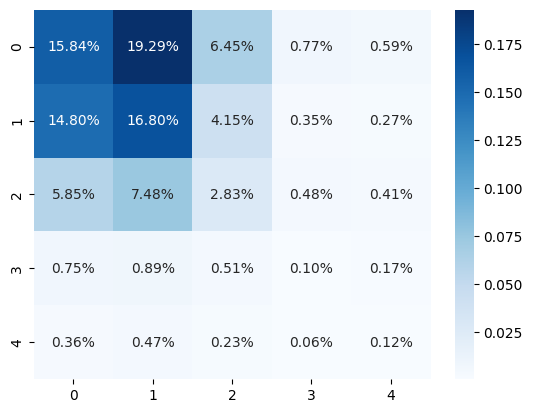

In [1398]:
# построим матрицу предсказаний

cf_matrix = confusion_matrix(y_true, y_pred)

target_names = [0, 1, 2, 3, 4]

sns.heatmap(
    cf_matrix/np.sum(cf_matrix),
    annot=True, fmt='.2%', cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names)

In [1399]:
# поиск лучших фичей
feat = model.get_feature_importance(train_pool, prettified=True)
feat.head(10)

,Feature Id,Importances
0,129,0.025274
1,13,0.010527
2,125,0.006622
3,103,0.004753
4,124,0.004634
5,128,0.003298
6,130,0.003079
7,10,0.002721
8,14,0.002659
9,104,0.002377


In [1400]:
# попробуем натренировать модель с помощью select_features, при использовании 23 фичей, результат даже лучше, чем fit 

model = CatBoostRanker(
    iterations = 1000,
    od_wait = 100, 
    custom_metric = 'NDCG:top=5'
)

model.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select = '0-108',
    num_features_to_select = 23,
    verbose = 50,
    train_final_model = True,
    plot=True
)

# 23 - 0.7276894 ###
# 25 - 0.7269576
# 24 - 0.7259825
# 30 - 0.7247383
# 22 - 0.7227895
# 20 - 0.7221585
# fit - 0.7216511
# 45 - 0.7189654
# 70 - 0.7179746
# 10 - 0.7129552

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Step #1 out of 1
0:	test: 0.5372030	best: 0.5372030 (0)	total: 95.4ms	remaining: 1m 35s
50:	test: 0.6856186	best: 0.6865852 (42)	total: 5.21s	remaining: 1m 36s
100:	test: 0.6975473	best: 0.6979207 (99)	total: 10.2s	remaining: 1m 30s
150:	test: 0.7044620	best: 0.7045764 (149)	total: 15.1s	remaining: 1m 24s
200:	test: 0.7109071	best: 0.7111427 (198)	total: 20s	remaining: 1m 19s
250:	test: 0.7145347	best: 0.7147174 (249)	total: 24.9s	remaining: 1m 14s
300:	test: 0.7148993	best: 0.7157796 (266)	total: 29.9s	remaining: 1m 9s
350:	test: 0.7146716	best: 0.7158830 (328)	total: 34.7s	remaining: 1m 4s
400:	test: 0.7157567	best: 0.7158830 (328)	total: 39.4s	remaining: 58.9s
450:	test: 0.7164496	best: 0.7169195 (422)	total: 44s	remaining: 53.6s
500:	test: 0.7160762	best: 0.7175468 (471)	total: 48.6s	remaining: 48.4s
550:	test: 0.7170084	best: 0.7181860 (526)	total: 53.4s	remaining: 43.5s
600:	test: 0.7169496	best: 0.7181860 (526)	total: 58s	remaining: 38.5s
650:	test: 0.7184064	best: 0.7186310 (64

{'selected_features': [10,
  12,
  13,
  24,
  25,
  29,
  44,
  46,
  48,
  49,
  53,
  54,
  65,
  67,
  72,
  80,
  85,
  100,
  102,
  103,
  104,
  105,
  106],
 'eliminated_features_names': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'loss_graph': {'main_indices': [0, 86],
  'removed_features_count': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,


In [1401]:
pd.DataFrame(y_test).describe()
#y_test

,0
count,30891.000000
mean,0.206678
std,0.220497
min,0.000000
25%,0.000000
50%,0.250000
75%,0.250000
max,1.000000


In [1402]:
# итоговая модель по всей выборке

In [1403]:
X_data = data.drop(data.columns[[0, 1]], axis = 1).values
y_data = data['rank'].values
queries_data = data['query_id'].values

data_pool = Pool(
    data = X_data,
    label = y_data,
    group_id = queries_data
)

In [1404]:
model = CatBoostRanker(
    iterations = 1000,
    od_wait = 100, 
    custom_metric = 'NDCG:top=5'
)

model.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select = '0-139',
    num_features_to_select = 23,
    verbose = 50,
    train_final_model = True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Step #1 out of 1
0:	test: 0.5372030	best: 0.5372030 (0)	total: 93.9ms	remaining: 1m 33s
50:	test: 0.6856186	best: 0.6865852 (42)	total: 4.98s	remaining: 1m 32s
100:	test: 0.6975473	best: 0.6979207 (99)	total: 10s	remaining: 1m 29s
150:	test: 0.7044620	best: 0.7045764 (149)	total: 14.9s	remaining: 1m 23s
200:	test: 0.7109071	best: 0.7111427 (198)	total: 20s	remaining: 1m 19s
250:	test: 0.7145347	best: 0.7147174 (249)	total: 24.9s	remaining: 1m 14s
300:	test: 0.7148993	best: 0.7157796 (266)	total: 29.7s	remaining: 1m 9s
350:	test: 0.7146716	best: 0.7158830 (328)	total: 34.5s	remaining: 1m 3s
400:	test: 0.7157567	best: 0.7158830 (328)	total: 39.3s	remaining: 58.7s
450:	test: 0.7164496	best: 0.7169195 (422)	total: 44s	remaining: 53.6s
500:	test: 0.7160762	best: 0.7175468 (471)	total: 48.8s	remaining: 48.6s
550:	test: 0.7170084	best: 0.7181860 (526)	total: 53.6s	remaining: 43.7s
600:	test: 0.7169496	best: 0.7181860 (526)	total: 58.3s	remaining: 38.7s
650:	test: 0.7184064	best: 0.7186310 (64

{'selected_features': [7,
  10,
  12,
  13,
  29,
  46,
  49,
  54,
  80,
  101,
  103,
  104,
  105,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  136],
 'eliminated_features_names': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'loss_graph': {'main_indices': [0, 117],
  'removed_features_count': [0,
   1,
   2,
   3,
   

In [1405]:
# нахождение PFound

PFound_scores = model.get_evals_result()['validation']['PFound']
PFound_scores.sort(reverse=True)
PFound_score_max = max(PFound_scores)
PFound_score_max

0.72768943171236

In [1406]:
# нахождение NDCG

NDCG_scores = model.get_evals_result()['validation']['NDCG:top=5;type=Base']
NDCG_scores.sort(reverse=True)
NDCG_score_max = max(NDCG_scores)
NDCG_score_max

0.5804799989480343

In [1407]:
# нахождение ndcg_5
ndcg_5 = model.score(test_pool, top = 5)
ndcg_5

0.5799517750160191

In [1408]:
# поиск лучших фичей
feat = model.get_feature_importance(train_pool, prettified=True)
feat.head(10)

,Feature Id,Importances
0,129,0.035638
1,13,0.011068
2,103,0.009799
3,10,0.008177
4,125,0.007989
5,104,0.007146
6,124,0.005390
7,128,0.003920
8,122,0.003101
9,126,0.002799
